In [1]:
#import necessary modules 
import sklearn
from nn import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits #import digits dataset
from sklearn.model_selection import train_test_split #to split the dataset into training, test, and validation

In [3]:
digits = load_digits() #load digits dataset
X = digits.data #extract data
x, x_test, y, y_test = train_test_split (X,X, test_size=0.2, train_size=0.8 ) #split into 80% training data and 20% testing data

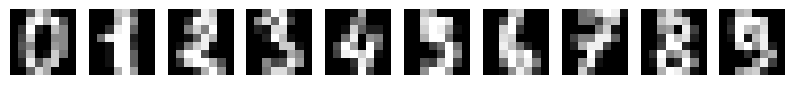

In [4]:
#visualizing the data
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(num_images, 5))

for i, ax in enumerate(axes):
    image = X[i].reshape(8, 8)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.show()

In [5]:
#define nn architecture
nn_architecture = [
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}
]

In [13]:
epoch = 500
autoencoder = nn.NeuralNetwork(nn_architecture, lr=0.1, seed=42, batch_size=63, epochs=epoch, loss_function='mean_squared_error')

In [14]:
train_loss, val_loss = autoencoder.fit(x, y, x_test, y_test)

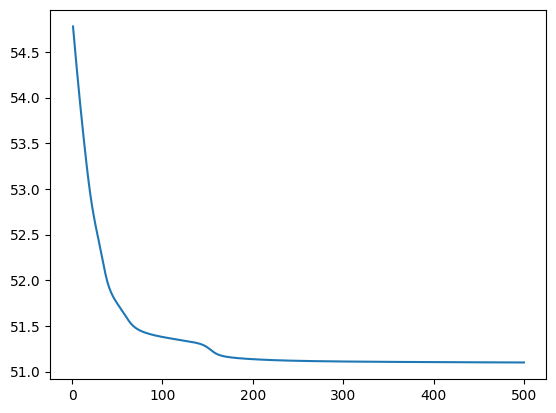

In [15]:
epochs = np.arange(1,epoch+1,1)
plt.plot(epochs,train_loss)

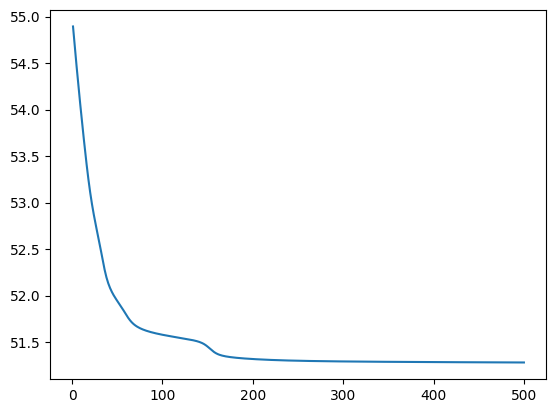

In [16]:
plt.plot(epochs,val_loss)